# Interacción entre Python, Shell

como ves, podemos ejecutar comandos shell desde este notebook. Fíjate que:

- con una admiración (!) intercalamos ejecuciones de shell en medio de nuestro código Python
- con dos admiraciones al principio de una celda, TODA la celda será ejecutada en un shell (no se interpreta el código Python)
- las variables de Python se pueden usar en las ejecuciones del shell
- capturamos los resultados de las ejecuciones shell en variables de Python
- para que las variables de entorno del shell y el directorio actual persistan entre llamadas desde distintas celdas hay que declararlas con %set_env y %cd
- Podemos pasar cualquier variable Python al shell

Y podemos ejecutar también código en R:
- con %R ejecutamos código R como con ! ejecutamos shell
- con %%R TODA la celda será ejecutada como código R
- las variables y el espacio de nombres de R persisten entre llamadas desde distintas celdas
- podemos intercambiar variables entre R y Python



# 1. Python y Shell

### Ejecutamos un comando cualquiera del sistema

In [ ]:
!pwd
!ls -la

/content
total 16
drwxr-xr-x 1 root root 4096 Mar 23 14:22 .
drwxr-xr-x 1 root root 4096 Apr  2 01:49 ..
drwxr-xr-x 4 root root 4096 Mar 23 14:21 .config
drwxr-xr-x 1 root root 4096 Mar 23 14:22 sample_data


### Guardamos el resultado del comando en una variable python

In [ ]:
ruta_actual = !pwd
print(ruta_actual)
path = !echo $PATH
print(path)

['/content']
['/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin']


### Usamos una variable Python dentro de la línea de comando

In [ ]:
for p in path[0].split(":"):
    files = !ls {p}
    print("number of files under", p, "is", len(files))
    

number of files under /opt/bin is 1
number of files under /usr/local/nvidia/bin is 1
number of files under /usr/local/cuda/bin is 10
number of files under /usr/local/sbin is 1
number of files under /usr/local/bin is 57
number of files under /usr/sbin is 25
number of files under /usr/bin is 486
number of files under /sbin is 21
number of files under /bin is 37
number of files under /tools/node/bin is 1
number of files under /tools/google-cloud-sdk/bin is 4


### Distintas formas de acceder al resultado recogido de una ejecución del shell

In [ ]:
a = !ls
print("Como una lista")
print("type", type(a)) 
print("len ", len(a))
print(a)
print("--")
print("Como un string unico")
print( "type", type(a.s), )
print("len ", len(a.s))
print(a.s)
print( "--" )
print("Como una lista de paths")
print("type", type(a.p),) 
print("len ", len(a.p))
print(a.p)


Como una lista
type <class 'IPython.utils.text.SList'>
len  1
['sample_data']
--
Como un string unico
type <class 'str'>
len  11
sample_data
--
Como una lista de paths
type <class 'list'>
len  1
[PosixPath('sample_data')]


In [ ]:
!ls

sample_data


In [ ]:
a = !ls -la
a
print(a.grep("nfig"))

['drwxr-xr-x 4 root root 4096 Mar 23 14:21 .config']


In [ ]:
df = !df -h
print(df)
print(df.fields())

['Filesystem      Size  Used Avail Use% Mounted on', 'overlay         108G   40G   69G  37% /', 'tmpfs            64M     0   64M   0% /dev', 'shm             5.8G     0  5.8G   0% /dev/shm', '/dev/root       2.0G  1.2G  817M  59% /sbin/docker-init', 'tmpfs           6.4G   32K  6.4G   1% /var/colab', '/dev/sda1        81G   44G   38G  54% /etc/hosts', 'tmpfs           6.4G     0  6.4G   0% /proc/acpi', 'tmpfs           6.4G     0  6.4G   0% /proc/scsi', 'tmpfs           6.4G     0  6.4G   0% /sys/firmware']
[['Filesystem', 'Size', 'Used', 'Avail', 'Use%', 'Mounted', 'on'], ['overlay', '108G', '40G', '69G', '37%', '/'], ['tmpfs', '64M', '0', '64M', '0%', '/dev'], ['shm', '5.8G', '0', '5.8G', '0%', '/dev/shm'], ['/dev/root', '2.0G', '1.2G', '817M', '59%', '/sbin/docker-init'], ['tmpfs', '6.4G', '32K', '6.4G', '1%', '/var/colab'], ['/dev/sda1', '81G', '44G', '38G', '54%', '/etc/hosts'], ['tmpfs', '6.4G', '0', '6.4G', '0%', '/proc/acpi'], ['tmpfs', '6.4G', '0', '6.4G', '0%', '/proc/scsi']

In [ ]:
!echo $PATH

/root/local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin


### Con `script` ejecutamos TODO el contenido de una celda en un shell

In [ ]:
%%script bash
which ls
which unzip
pwd
which find

/bin/ls
/usr/bin/unzip
/content
/usr/bin/find


In [ ]:
%%script bash
mkdir tmp3
cd tmp3
cp `which ls` listar
./listar -ls

total 132
132 -rwxr-xr-x 1 root root 133792 Apr  2 02:09 listar


In [ ]:
!ls -lh tmp3/listar

-rwxr-xr-x 1 root root 131K Apr  2 02:09 tmp3/listar


### el directorio actual y las variables de entorno solo son válidos en la celda en la que se ejecutan

In [ ]:
!listar

/bin/sh: 1: listar: not found


In [ ]:
!./listar

/bin/sh: 1: ./listar: not found


In [ ]:
%%script bash
pwd
cd tmp
./listar -las

/root/PythonTest/BioScripts
total 136
  4 drwxr-xr-x  2 root root   4096 Oct  4 10:40 .
  4 drwxr-xr-x 13 root root   4096 Oct  7 12:09 ..
128 -rwxr-xr-x  1 root root 130736 Oct  7 12:09 listar


In [ ]:
!./listar -las

/bin/sh: 1: ./listar: not found


### usa %cd para que el cambio de directorio tenga efecto al ejecutar shells

In [ ]:
%cd tmp

/root/PythonTest/BioScripts/tmp


In [ ]:
!./listar -las

total 136
  4 drwxr-xr-x  2 root root   4096 Oct  4 10:40 .
  4 drwxr-xr-x 11 root root   4096 Oct  4 10:49 ..
128 -rwxr-xr-x  1 root root 130736 Oct  4 10:49 listar


### usa %set_env para darle valor a variables de entorno

In [ ]:
%%script bash
export MY_VAR="algo de texto"
echo $MY_VAR

algo de texto


In [ ]:
%set_env MY_VAR="otro texto"

env: MY_VAR="otro texto"


In [ ]:
!echo $MY_VAR

"otro texto"


## añadir captura de stdout stderr y código de ejecución del proceso

### Algo más elaborado

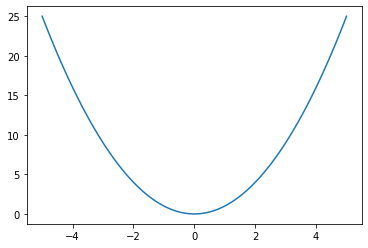

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(-5,5,100)
y = x**2
plt.plot(x,y)